In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#stock data
tickers = ["APT.AX", "XRO.AX", "CPU.AX", "WTC.AX", "NXT.AX"]#, "ALU", "APX", "TNE", "PPH", "LNK"]
data = yf.download(tickers, start="2018-07-07", end="2020-07-07",
                   group_by="ticker")
data.head()

[*********************100%***********************]  5 of 5 completed


CPU.AX                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2018-07-09  18.139999  18.230000  17.900000  18.020000  17.115356  1793141   
2018-07-10  18.000000  18.110001  17.920000  17.930000  17.029873  1262050   
2018-07-11  17.940001  18.230000  17.940001  18.129999  17.219831   980803   
2018-07-12  18.260000  18.450001  18.129999  18.350000  17.428789  1150168   
2018-07-13  18.290001  18.490000  18.120001  18.190001  17.276825  1068356   

               XRO.AX                                   ... NXT.AX        \
                 Open       High        Low      Close  ...    Low Close   
Date                                                    ...                
2018-07-09  45.500000  45.980000  45.040001  45.529999  ...   7.31  7.36   
2018-07-10  45.439999  46.400002  45.080002  45.200001  ...   6.85  7.09   
2018-07-11  45.000000  45.330002  44.360001  44.419998  ...   6.99  7.01   
2018-07-12  44.599998  46.270000  44.599998  45.799999  ...   6.99  7.18   
2018-07-13  46.000000  46.869999  45.779999  46.290001  ...   7.26  7.28   

                                  WTC.AX                               \
           Adj Close   Volume       Open       High        Low  Close   
Date                                                                    
2018-07-09      7.36  4582926  16.430000  16.540001  16.090000  16.26   
2018-07-10      7.09  5237142  16.450001  16.650000  16.309999  16.42   
2018-07-11      7.01  5533519  16.410000  16.450001  16.129999  16.16   
2018-07-12      7.18  1657551  16.299999  17.135000  16.160000  17.09   
2018-07-13      7.28  1380530  17.000000  18.010000  17.000000  17.90   

                               
            Adj Close  Volume  
Date                           
2018-07-09  16.209213  376818  
2018-07-10  16.368715  427708  
2018-07-11  16.109524  543196  
2018-07-12  17.036621  707886  
2018-07-13  17.844090  744689  

[5 rows x 30 columns]

In [4]:
a = pd.DataFrame(data["APT.AX"]["Close"]).rename(columns = {"Close": "APT"}) 
b = pd.DataFrame(data["XRO.AX"]["Close"]).rename(columns = {"Close": "XRO"})
c = pd.DataFrame(data["CPU.AX"]["Close"]).rename(columns = {"Close": "CPU"})
d = pd.DataFrame(data["WTC.AX"]["Close"]).rename(columns = {"Close": "WTC"})
e = pd.DataFrame(data["NXT.AX"]["Close"]).rename(columns = {"Close": "NXT"})
close_price = e.merge(d.merge(c.merge(a.merge(b, on = "Date"), on = "Date"), on = "Date"), on = "Date")
close_price

,NXT,WTC,CPU,APT,XRO
Date,,,,,
2018-07-09,7.36,16.260000,18.020000,10.250000,45.529999
2018-07-10,7.09,16.420000,17.930000,10.400000,45.200001
2018-07-11,7.01,16.160000,18.129999,10.400000,44.419998
2018-07-12,7.18,17.090000,18.350000,10.850000,45.799999
2018-07-13,7.28,17.900000,18.190001,10.980000,46.290001
...,...,...,...,...,...
2020-06-30,9.88,19.350000,13.250000,60.990002,90.110001
2020-07-01,10.68,18.549999,13.420000,62.240002,90.800003
2020-07-02,10.76,19.700001,13.480000,68.160004,91.800003


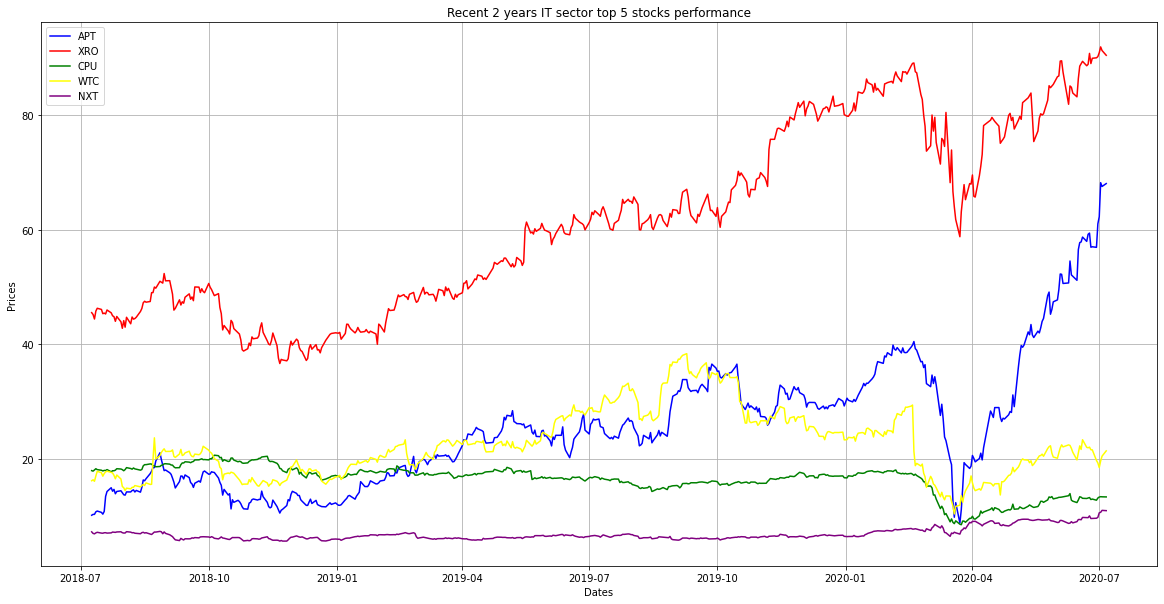

In [63]:
plt.figure(figsize=(20,10))

APT, = plt.plot(close_price.index, close_price["APT"], color='blue', label="APT")
XRO, = plt.plot(close_price.index, close_price["XRO"], color='red', label="XRO")
CPU, = plt.plot(close_price.index, close_price["CPU"], color='green', label="CPU")
WTC, = plt.plot(close_price.index, close_price["WTC"], color='yellow', label="WTC")
NXT, = plt.plot(close_price.index, close_price["NXT"], color='purple', label="NXT")
plt.legend(handles=[APT, XRO, CPU, WTC, NXT], loc="upper left")
plt.title("Recent 2 years IT sector top 5 stocks price")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.grid()

In [5]:
a = pd.DataFrame(data["APT.AX"]["Volume"]).rename(columns = {"Volume": "APT"}) 
b = pd.DataFrame(data["XRO.AX"]["Volume"]).rename(columns = {"Volume": "XRO"})
c = pd.DataFrame(data["CPU.AX"]["Volume"]).rename(columns = {"Volume": "CPU"})
d = pd.DataFrame(data["WTC.AX"]["Volume"]).rename(columns = {"Volume": "WTC"})
e = pd.DataFrame(data["NXT.AX"]["Volume"]).rename(columns = {"Volume": "NXT"})
volume = e.merge(d.merge(c.merge(a.merge(b, on = "Date"), on = "Date"), on = "Date"), on = "Date")
volume

,NXT,WTC,CPU,APT,XRO
Date,,,,,
2018-07-09,4582926,376818,1793141,1414006,211942
2018-07-10,5237142,427708,1262050,1894696,319632
2018-07-11,5533519,543196,980803,1282316,307383
2018-07-12,1657551,707886,1150168,1646554,1797107
2018-07-13,1380530,744689,1068356,2073182,367086
...,...,...,...,...,...
2020-06-30,1603298,2300425,1906000,3256850,658410
2020-07-01,2978568,3225628,1290114,2559434,341747
2020-07-02,3019651,3200767,1488163,2818784,332002


In [96]:
# weighted average return of IT sector (ask ryan on matrix operation & applying rolling window)
market_cap = close_price * volume
total = market_cap["APT"] + market_cap["XRO"] + market_cap["CPU"] + market_cap["WTC"] + market_cap["NXT"]

#market_cap
#total
weights =pd.DataFrame(market_cap["NXT"] / total).rename(columns = {0:"NXT"})
weights["WTC"] = market_cap["WTC"] / total
weights["CPU"] = market_cap["CPU"] / total
weights["APT"] = market_cap["APT"] / total
weights["XRO"] = market_cap["XRO"] / total
weights = weights[1:]

daily_return = close_price.pct_change(1).dropna()
#daily_return
weighted_ave_return = daily_return["NXT"]*weights["NXT"] + daily_return["WTC"]*weights["WTC"] + daily_return["CPU"]*weights["CPU"] + daily_return["APT"]*weights["APT"] + daily_return["XRO"]*weights["XRO"]
weighted_ave_return = weighted_ave_return.rolling(window = 20).mean().dropna()
weighted_ave_return

Date
2018-08-06    0.008647
2018-08-07    0.009766
2018-08-08    0.010255
2018-08-09    0.008324
2018-08-10    0.007875
                ...   
2020-06-30    0.007566
2020-07-01    0.006815
2020-07-02    0.008084
2020-07-03    0.007913
2020-07-06    0.009364
Length: 486, dtype: float64

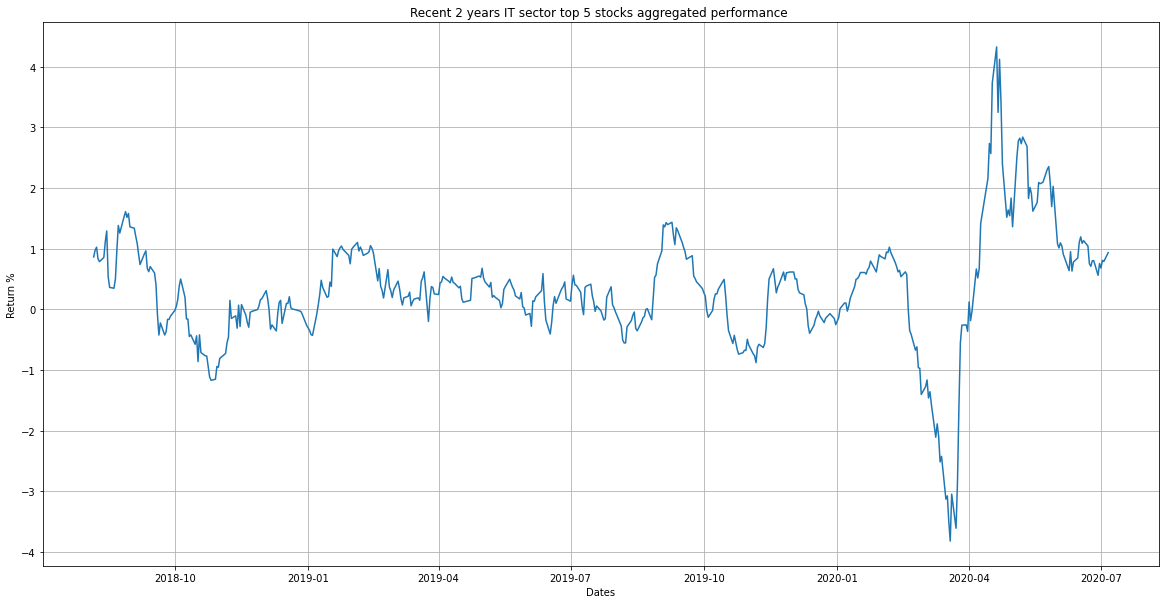

In [97]:
plt.figure(figsize=(20,10))
plt.plot(weighted_ave_return.index, weighted_ave_return*100)
plt.title("Recent 2 years IT sector top 5 stocks aggregated performance ")
plt.xlabel("Dates")
plt.ylabel("Return %")
plt.grid()

In [80]:
#total

In [81]:
#weights

In [74]:
#unemployment data (ask ryan why rename columns does not work)
unemployment = pd.read_excel("C:/Users/li116/OneDrive/Desktop/class/project/Mustard-Ferrets/abssheets/uemploy/6354001.xls",sheet_name = "Data1",header = 0, index_col = 0)[9:]

unemployment = pd.DataFrame(unemployment["Job Vacancies ;  Australia ;"]).dropna()
unemployment = unemployment.loc["2018":"2020"]
unemployment.columns = ["Australia unemployment"]
unemployment

,Australia unemployment
2018-02-15,215
2018-05-15,214.4
2018-08-15,231.3
2018-11-15,234.7
2019-02-15,234.7
2019-05-15,219.1
2019-08-15,226.3
2019-11-15,231.4
2020-02-15,229.5
2020-05-15,124.5


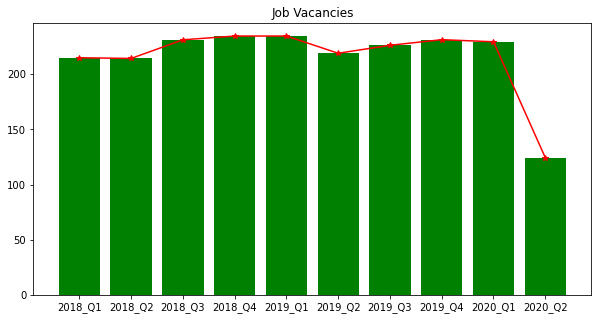

In [92]:
plt.figure(figsize=(10,5))
year = ["2018_Q1", "2018_Q2", "2018_Q3", "2018_Q4", "2019_Q1", "2019_Q2", "2019_Q3", "2019_Q4", "2020_Q1", "2020_Q2"]
vacancies = [215, 214.4, 231.3, 234.7, 234.7, 219.1, 226.3, 231.4, 229.5, 124.5]
#x_axis = np.arange(len(vacancies))
plt.bar(year, vacancies, color="green", align="center")
plt.title("Job Vacancies")
plt.plot(vacancies, color='red', marker = "*")

In [83]:
#DGP data
#unemployment data
GDP = pd.read_excel("C:/Users/li116/OneDrive/Desktop/class/project/Mustard-Ferrets/abssheets/gdpsheets/5206001_key_aggregates.xls",sheet_name = "Data1",header = 0, index_col = 0)[9:]
GDP
GDP = pd.DataFrame(GDP["Gross domestic product: Chain volume measures - Percentage changes ;"])
GDP = GDP.dropna().loc["2018":"2020"]
GDP

,Gross domestic product: Chain volume measures - Percentage changes ;
2018-03-01,0.8
2018-06-01,0.6
2018-09-01,0.4
2018-12-01,0.3
2019-03-01,0.4


In [86]:
#FX data
fx = pd.read_excel("C:/Users/li116/OneDrive/Desktop/class/project/Mustard-Ferrets/abssheets/fxrates/2018-current.xls",header = 1, index_col = 0)[9:]

fx

,A$1=USD,Trade-weighted Index May 1970 = 100,A$1=CNY,A$1=JPY,A$1=EUR,A$1=KRW,A$1=GBP,A$1=SGD,A$1=INR,A$1=THB,...,A$1=IDR,A$1=VND,A$1=AED,A$1=PGK,A$1=HKD,A$1=CAD,A$1=ZAR,A$1=CHF,A$1=PHP,A$1=SDR
Title,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.7837,65.1,5.0948,88.33,0.6522,831.98,0.5799,1.0449,49.92,25.47,...,10614,17798,2.8781,2.5321,6.1257,0.9824,NaN,0.7631,NaN,0.5503
2018-01-03,0.7816,64.8,5.0842,87.8,0.6485,832.76,0.5747,1.0393,49.65,25.36,...,10551,17749,2.8704,2.5254,6.1104,0.9783,NaN,0.7597,NaN,0.5473
2018-01-04,0.7835,65,5.0983,88.27,0.6519,834.07,0.5795,1.0421,49.76,25.28,...,10541,17793,2.8774,2.5315,6.126,0.982,NaN,0.766,NaN,0.5493
2018-01-05,0.7857,65,5.0916,88.69,0.6508,834.37,0.5791,1.0423,49.77,25.27,...,10535,17843,2.8855,2.5386,6.1439,0.9809,NaN,0.7655,NaN,0.5503
2018-01-08,0.7842,65,5.0893,88.78,0.6521,836.45,0.5784,1.0429,49.64,25.23,...,10516,17809,2.88,2.5338,6.1335,0.9726,NaN,0.7652,NaN,0.5495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25,0.6875,60,4.8663,73.68,0.6113,827.33,0.5537,0.9568,52.02,21.24,...,9728,15953,2.5248,2.3789,5.3283,0.9381,NaN,0.6522,NaN,0.497
2020-06-26,0.6888,60.1,4.8755,73.74,0.6138,825.64,0.5542,0.958,51.97,21.28,...,9764,15988,2.5296,2.3834,5.3383,0.9394,NaN,0.6531,NaN,0.5001
2020-06-29,0.6879,60.1,4.8676,73.67,0.6114,825.12,0.5559,0.9583,51.98,21.26,...,9813,15960,2.5263,2.3803,5.3316,0.9399,NaN,0.6514,NaN,0.4991
